In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df

,M_axial force,M_BM_X,M_BM_Y,M_Torosion_z,M_Channel1,M_channel2,M_spindlepow,M_spindlecurr,SK1,SK2,...,sd_spcurre,K_axialforce,k_bm_x,k_bm_y,k_torsion,k_ch1,k_ch2,k_sppow,k_spcurre,target
0,150.730000,1.093600,-22.499000,22.779000,4.057000,4.231800,2.484100,1.022700,150.730000,1.093600,...,1.022700,150.730000,1.093600,-22.499000,22.779000,4.057000,4.231800,2.484100,1.022700,normal
1,162.065538,1.433294,-18.004274,10.106445,2.114120,2.470021,2.272916,0.972054,0.004498,-0.304175,...,-1.205633,180.905649,2.226193,24.350589,26.876632,3.609042,3.682772,0.195253,0.067077,normal
2,188.190960,0.934517,-9.444355,10.850532,1.808268,2.143911,2.286349,-0.921206,-0.118980,-0.376671,...,-0.749979,180.664939,2.067530,25.338136,23.181938,5.648299,5.813380,0.249130,1.197877,normal
3,230.202927,0.125231,-5.276622,7.720852,1.964564,2.298225,2.093269,-1.638720,-0.125422,-0.689805,...,-1.803250,175.842307,2.016403,17.493249,16.813903,6.503650,6.692081,0.129769,0.079544,normal
4,177.807821,1.194841,-13.737520,12.782471,1.604384,1.950010,2.093751,-1.777645,-0.029607,-0.535148,...,-1.528070,183.793578,2.121249,26.624539,26.635860,5.027314,5.133803,0.098083,0.188360,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3017,8.564784,1.137803,6.195118,4.873199,1.374757,1.977247,2.424321,-0.439425,-0.010138,-0.650174,...,0.314037,174.728426,1.855374,23.530557,25.685114,4.260584,4.335279,0.198495,1.010925,severe
3018,30.384259,0.906638,9.407319,-4.681368,0.954647,1.552053,2.127496,1.614389,-0.068854,-0.417581,...,-0.947895,173.911274,1.985339,24.389434,19.395739,5.846500,5.948633,0.093027,0.217053,severe
3019,13.445555,0.868041,7.671648,5.098915,1.415128,2.018005,2.104901,1.616355,-0.200706,-0.376847,...,1.228712,175.361586,1.918303,21.417094,21.132644,3.783201,3.847994,0.092543,0.115914,severe
3020,14.689721,0.817434,0.286392,5.633249,0.991882,1.588757,2.022364,1.686748,-0.026878,-0.529480,...,-0.382913,171.501257,1.948793,20.421518,22.817076,4.892982,4.974048,0.088419,0.114728,severe


In [ ]:
df.isnull().sum()

M_axial force    0
M_BM_X           0
M_BM_Y           0
M_Torosion_z     0
M_Channel1       0
M_channel2       0
M_spindlepow     0
M_spindlecurr    0
SK1              0
SK2              0
SK3              0
SK4              0
SK5              0
SK6              0
SK7              0
SK8              0
SD_AXIAL         0
SD_bm_X          0
Sd_bm_y          0
sd_torsion       0
sd_ch1           0
sd_ch2           0
sd_sppow         0
sd_spcurre       0
K_axialforce     0
k_bm_x           0
k_bm_y           0
k_torsion        0
k_ch1            0
k_ch2            0
k_sppow          0
k_spcurre        0
target           0
dtype: int64

Random Forest

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.8644628099173554


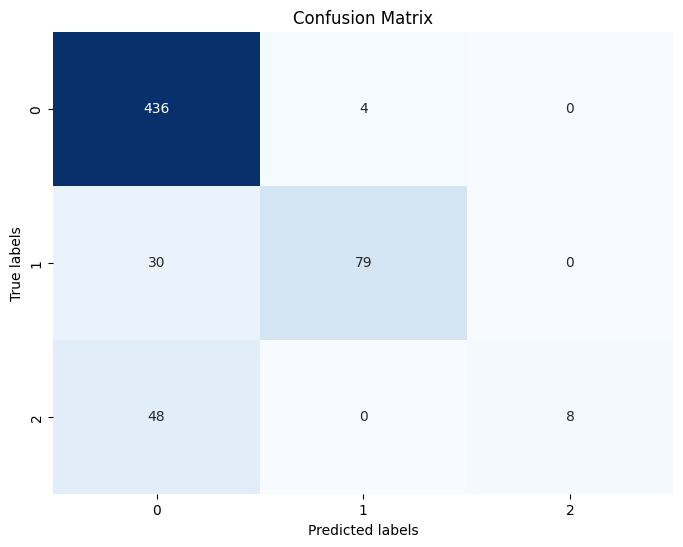

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       440
           1       0.95      0.72      0.82       109
           2       1.00      0.14      0.25        56

    accuracy                           0.86       605
   macro avg       0.93      0.62      0.66       605
weighted avg       0.88      0.86      0.84       605



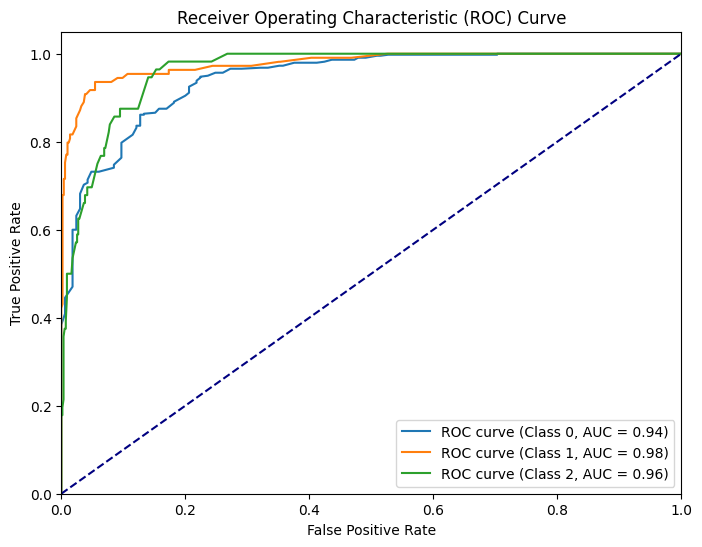

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV file
df = pd.read_csv("/content/drive/MyDrive/AIR/without time.csv")

# Features are all columns except the last one
X = df.iloc[:, :-1]

# Target is the last column
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Random Forest classifier with the best parameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(best_rf_classifier.classes_)):  # Assuming number of classes in best_rf_classifier
    fpr, tpr, _ = roc_curve(y_test, best_rf_classifier.predict_proba(X_test_scaled)[:,i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (Class {i}, AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=78)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (3022, 32)
Shape of X after SMOTE: (6906, 32)

Balance of positive and negative classes (%):


target_Labels
1    33.333333
0    33.333333
2    33.333333
Name: proportion, dtype: float64

Accuracy = 0.97
Recall = 0.97



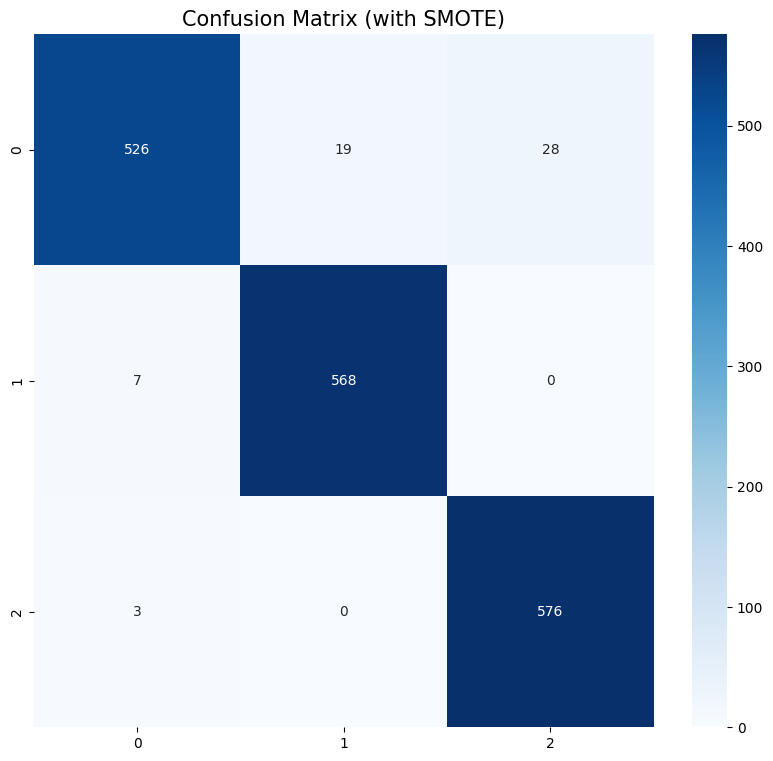

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

# Train the Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Calculate accuracy and recall
accuracy = accuracy_score(y_test, preds)
recall = recall_score(y_test, preds, average='weighted')
print(f'Accuracy = {accuracy:.2f}\nRecall = {recall:.2f}\n')

# Plot confusion matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(10, 9))
plt.title('Confusion Matrix (with SMOTE)', size=15)
sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
plt.show()


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy (without SMOTE): 0.8664021164021164
Accuracy (with SMOTE): 0.9669947886508397


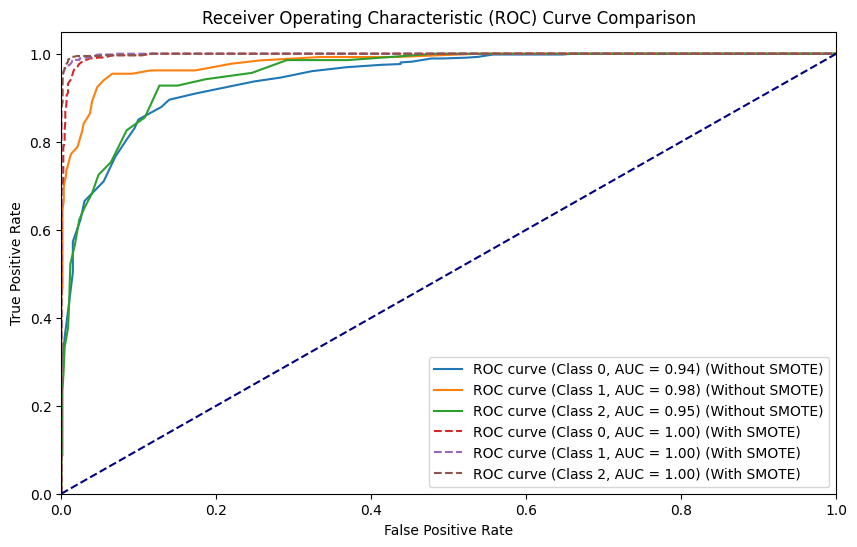

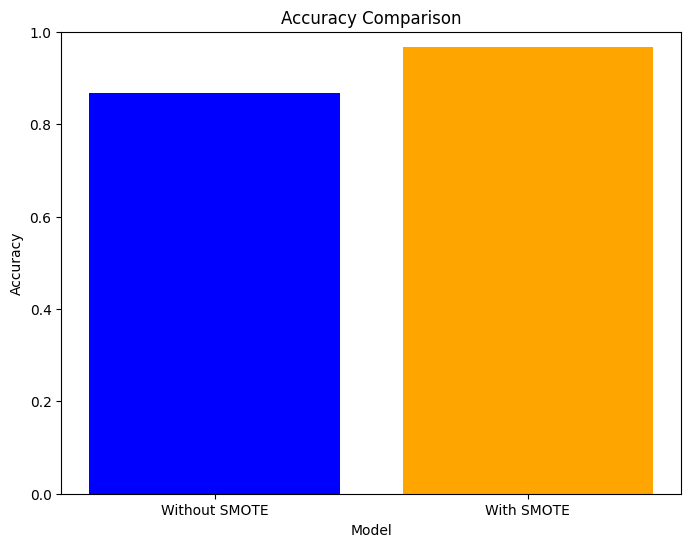

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Load data from CSV file
df = pd.read_csv("/content/drive/MyDrive/AIR/without time.csv")

# Features are all columns except the last one
X = df.iloc[:, :-1]

# Target is the last column
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Random Forest classifier with the best parameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test_scaled)

# Calculate accuracy without SMOTE
accuracy_without_smote = accuracy_score(y_test, y_pred)
print("Accuracy (without SMOTE):", accuracy_without_smote)

# Apply SMOTE to balance the classes
sm = SMOTE(random_state=78)
X_sm, y_sm = sm.fit_resample(X, y)

# Split the data into training and testing sets with SMOTE
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

# Train the Random Forest classifier with SMOTE
model_smote = RandomForestClassifier(random_state=42)
model_smote.fit(X_train_sm, y_train_sm)

# Make predictions on the test set with SMOTE
y_pred_smote = model_smote.predict(X_test_sm)

# Calculate accuracy with SMOTE
accuracy_with_smote = accuracy_score(y_test_sm, y_pred_smote)
print("Accuracy (with SMOTE):", accuracy_with_smote)

# Plot ROC curves with and without SMOTE for comparison
plt.figure(figsize=(10, 6))

# Plot ROC curve without SMOTE
for i in range(len(best_rf_classifier.classes_)):
    fpr, tpr, _ = roc_curve(y_test, best_rf_classifier.predict_proba(X_test_scaled)[:,i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (Class {i}, AUC = {roc_auc:.2f}) (Without SMOTE)')

# Plot ROC curve with SMOTE
for i in range(len(model_smote.classes_)):
    fpr, tpr, _ = roc_curve(y_test_sm, model_smote.predict_proba(X_test_sm)[:,i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linestyle='--', label=f'ROC curve (Class {i}, AUC = {roc_auc:.2f}) (With SMOTE)')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc="lower right")
plt.show()

# Plot accuracy comparison
plt.figure(figsize=(8, 6))
plt.bar(['Without SMOTE', 'With SMOTE'], [accuracy_without_smote, accuracy_with_smote], color=['blue', 'orange'])
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()


Gradient Boosting

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Accuracy: 0.9074380165289256


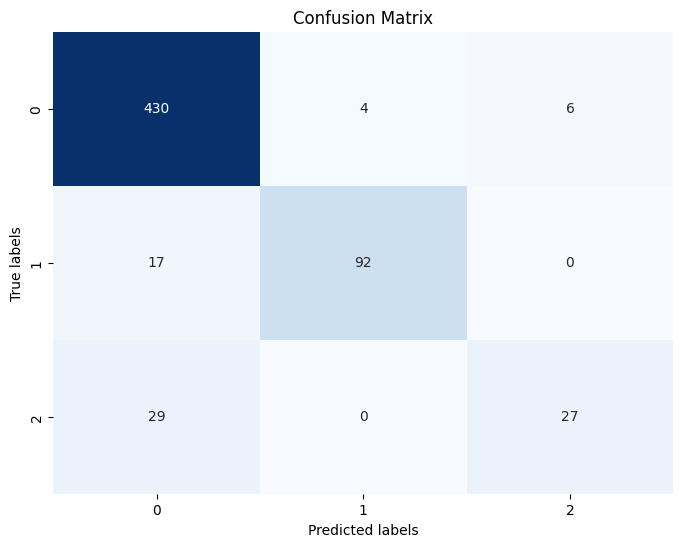

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       440
           1       0.96      0.84      0.90       109
           2       0.82      0.48      0.61        56

    accuracy                           0.91       605
   macro avg       0.89      0.77      0.81       605
weighted avg       0.91      0.91      0.90       605



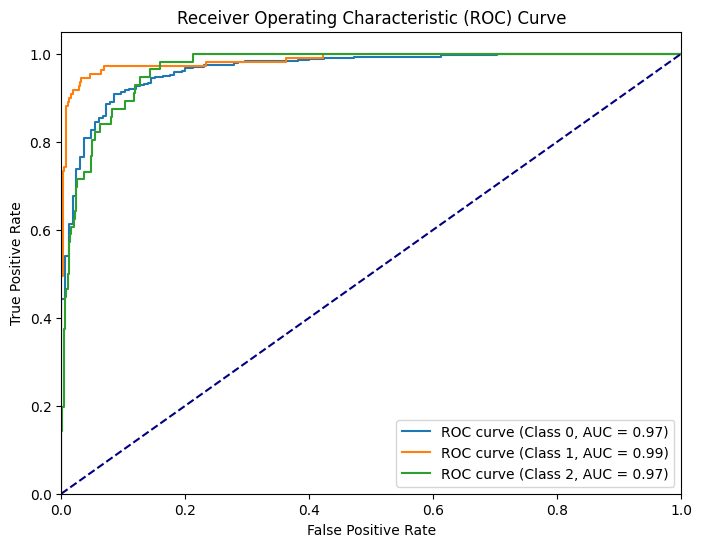

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV file
df = pd.read_csv("/content/drive/MyDrive/AIR/without time.csv")

# Features are all columns except the last one
X = df.iloc[:, :-1]

# Target is the last column
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Create the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Gradient Boosting classifier with the best parameters
best_gradient_boosting = GradientBoostingClassifier(random_state=42, **best_params)
best_gradient_boosting.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_gradient_boosting.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(best_gradient_boosting.classes_)):  # Assuming number of classes in best_gradient_boosting
    fpr, tpr, _ = roc_curve(y_test, best_gradient_boosting.predict_proba(X_test_scaled)[:,i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (Class {i}, AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=78)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (3022, 32)
Shape of X after SMOTE: (6906, 32)

Balance of positive and negative classes (%):


target_Labels
1    33.333333
0    33.333333
2    33.333333
Name: proportion, dtype: float64

Accuracy = 0.95
Recall = 0.95



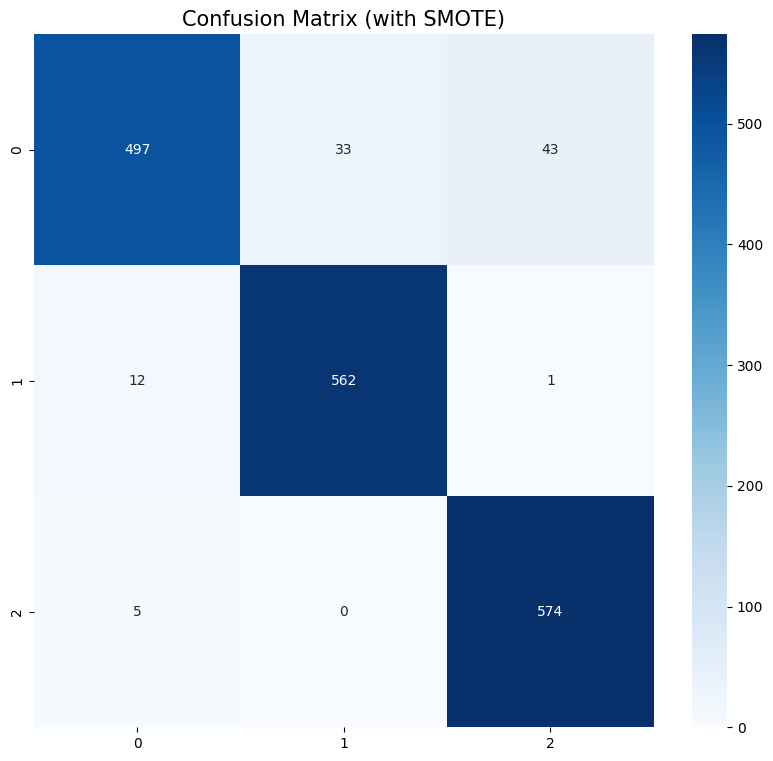

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

# Train the Gradient Boosting classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Calculate accuracy and recall
accuracy = accuracy_score(y_test, preds)
recall = recall_score(y_test, preds, average='weighted')  # Specify average='weighted' for 3 classes
print(f'Accuracy = {accuracy:.2f}\nRecall = {recall:.2f}\n')

# Plot confusion matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(10, 9))
plt.title('Confusion Matrix (with SMOTE)', size=15)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.show()


In [1]:
!pip install imbalanced-learn


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Accuracy (without SMOTE): 0.9087301587301587
Accuracy (with SMOTE): 0.9664157498552403


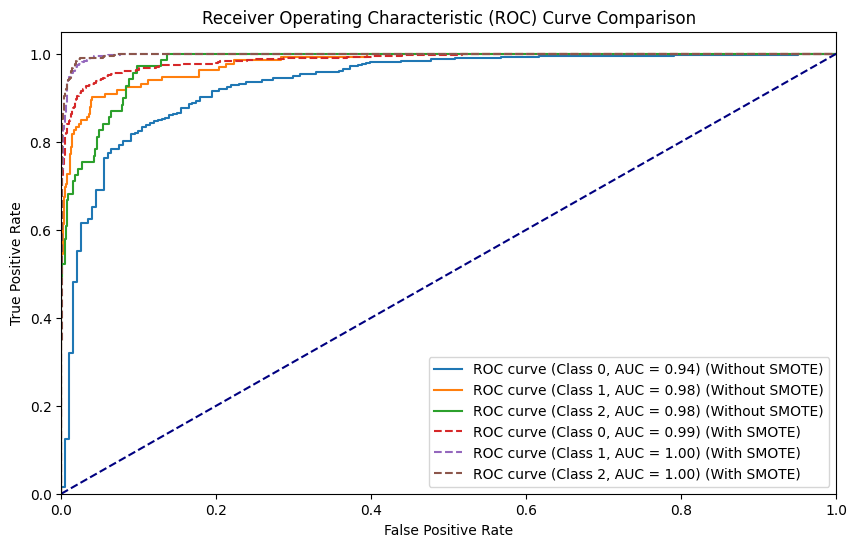

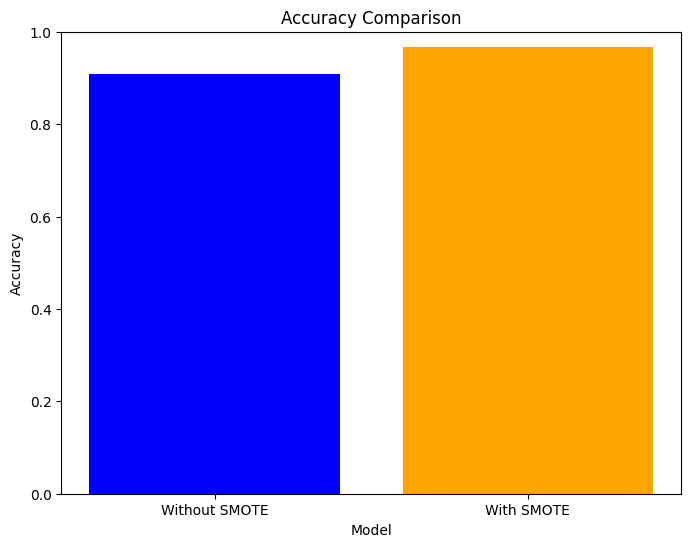

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Load data from CSV file
df = pd.read_csv("/content/drive/MyDrive/AIR/without time.csv")

# Features are all columns except the last one
X = df.iloc[:, :-1]

# Target is the last column
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the best hyperparameters
best_params = {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}

# Train the Gradient Boosting classifier with the best hyperparameters
best_gb_classifier = GradientBoostingClassifier(random_state=42, **best_params)
best_gb_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_gb_classifier.predict(X_test_scaled)

# Calculate accuracy without SMOTE
accuracy_without_smote = accuracy_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Accuracy (without SMOTE):", accuracy_without_smote)

# Apply SMOTE to balance the classes
sm = SMOTE(random_state=78)
X_sm, y_sm = sm.fit_resample(X, y)

# Split the data into training and testing sets with SMOTE
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

# Train the Gradient Boosting classifier with SMOTE
model_smote = GradientBoostingClassifier(random_state=42, **best_params)
model_smote.fit(X_train_sm, y_train_sm)

# Make predictions on the test set with SMOTE
y_pred_smote = model_smote.predict(X_test_sm)

# Calculate accuracy with SMOTE
accuracy_with_smote = accuracy_score(y_test_sm, y_pred_smote)
print("Accuracy (with SMOTE):", accuracy_with_smote)

# Plot ROC curves with and without SMOTE for comparison
plt.figure(figsize=(10, 6))

# Plot ROC curve without SMOTE
for i in range(len(best_gb_classifier.classes_)):
    fpr, tpr, _ = roc_curve(y_test, best_gb_classifier.decision_function(X_test_scaled)[:, i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (Class {i}, AUC = {roc_auc:.2f}) (Without SMOTE)')

# Plot ROC curve with SMOTE
for i in range(len(model_smote.classes_)):
    fpr, tpr, _ = roc_curve(y_test_sm, model_smote.decision_function(X_test_sm)[:, i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linestyle='--', label=f'ROC curve (Class {i}, AUC = {roc_auc:.2f}) (With SMOTE)')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc="lower right")
plt.show()

# Plot accuracy comparison
plt.figure(figsize=(8, 6))
plt.bar(['Without SMOTE', 'With SMOTE'], [accuracy_without_smote, accuracy_with_smote], color=['blue', 'orange'])
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()


Logistic Regression

Accuracy: 0.8888888888888888


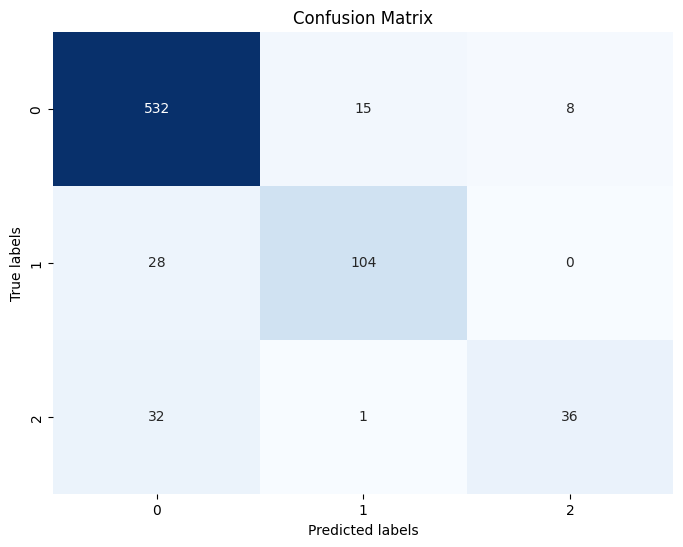

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       555
           1       0.87      0.79      0.83       132
           2       0.82      0.52      0.64        69

    accuracy                           0.89       756
   macro avg       0.86      0.76      0.80       756
weighted avg       0.89      0.89      0.88       756



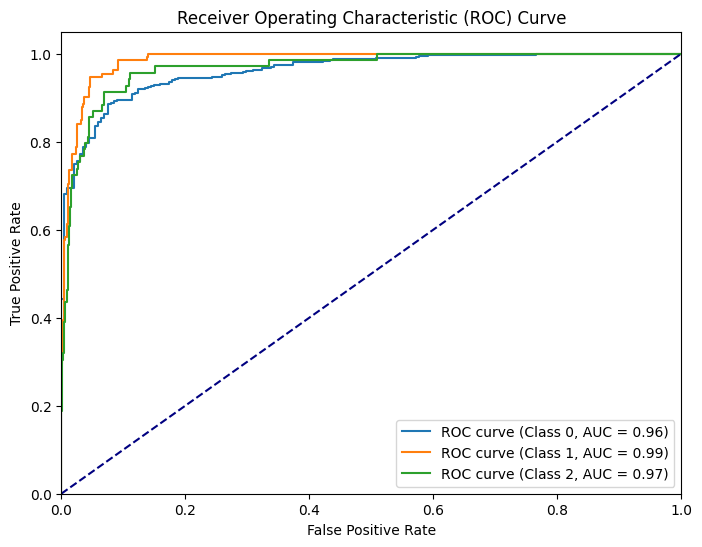

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV file
df = pd.read_csv("/content/drive/MyDrive/AIR/without time.csv")

# Features are all columns except the last one
X = df.iloc[:, :-1]

# Target is the last column
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Logistic Regression classifier with default hyperparameters
logistic_regression = LogisticRegression(random_state=42, max_iter=1000)

# Train the Logistic Regression classifier
logistic_regression.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logistic_regression.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(logistic_regression.classes_)):
    fpr, tpr, _ = roc_curve(y_test, logistic_regression.predict_proba(X_test_scaled)[:,i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (Class {i}, AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=78)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (3022, 32)
Shape of X after SMOTE: (6906, 32)

Balance of positive and negative classes (%):


target_Labels
1    33.333333
0    33.333333
2    33.333333
Name: proportion, dtype: float64

Accuracy = 0.90
Recall = 0.90



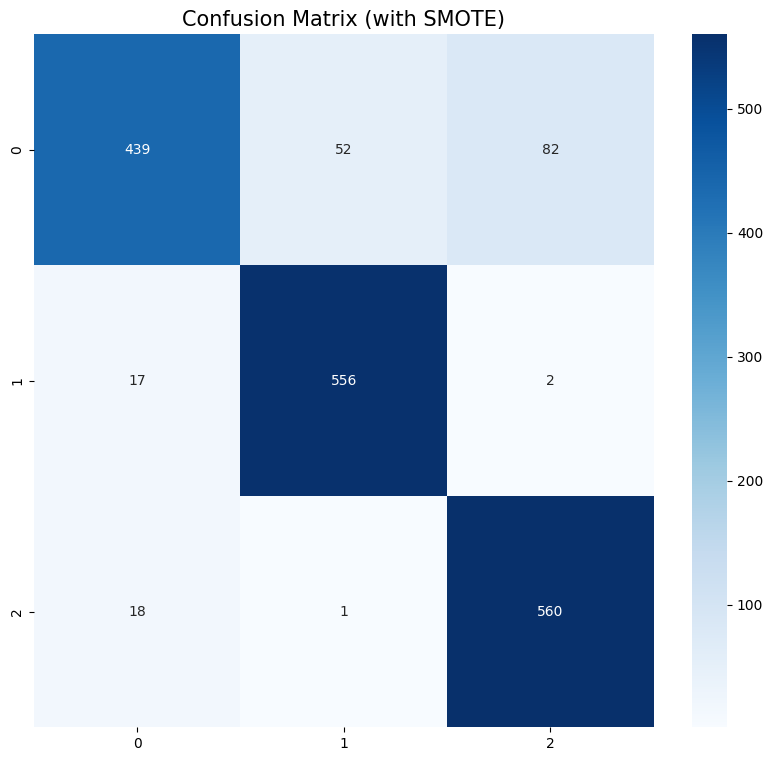

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

# Train the Logistic Regression classifier with adjusted parameters
model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)  # Adjust solver and max_iter
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Calculate accuracy and recall
accuracy = accuracy_score(y_test, preds)
recall = recall_score(y_test, preds, average='weighted')  # Specify average='weighted' for 3 classes
print(f'Accuracy = {accuracy:.2f}\nRecall = {recall:.2f}\n')

# Plot confusion matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(10, 9))
plt.title('Confusion Matrix (with SMOTE)', size=15)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (without SMOTE): 0.8888888888888888


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (with SMOTE): 0.8419224088013897


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (without SMOTE): 0.9119861030689056


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (with SMOTE): 0.8419224088013897


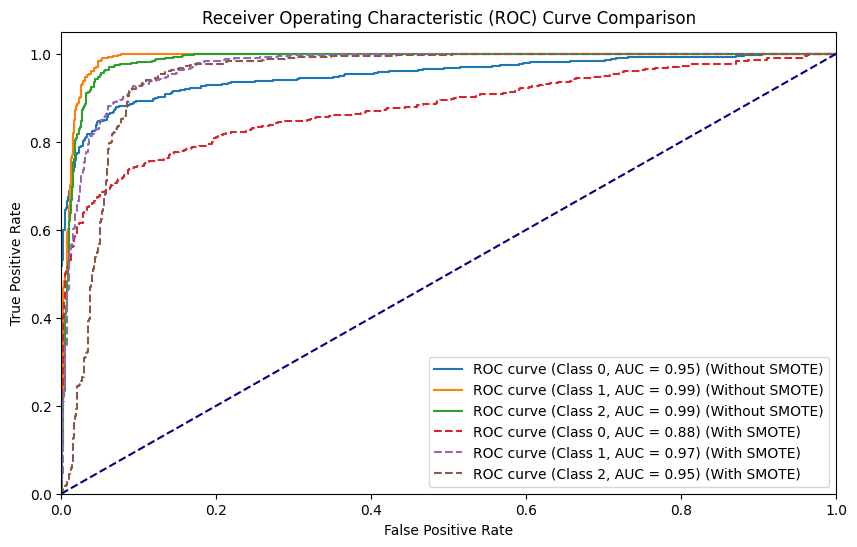

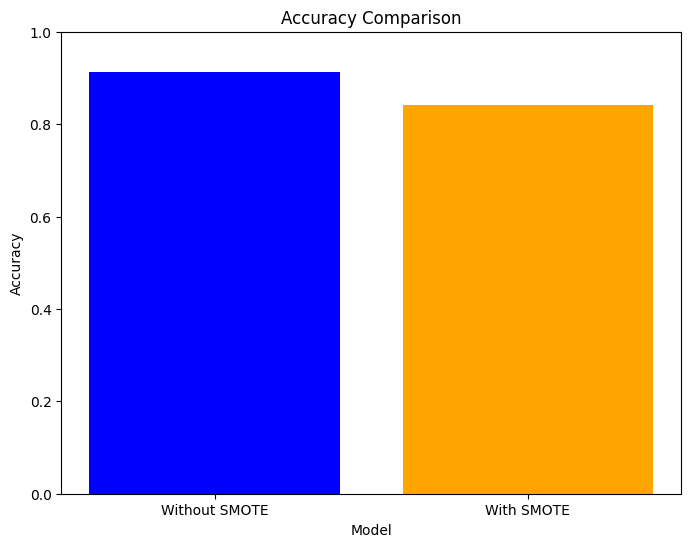

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load data from CSV file
df = pd.read_csv("/content/drive/MyDrive/AIR/without time.csv")

# Features are all columns except the last one
X = df.iloc[:, :-1]

# Target is the last column
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier
logreg_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg_classifier.predict(X_test_scaled)

# Calculate accuracy without SMOTE
accuracy_without_smote = accuracy_score(y_test, y_pred)
print("Accuracy (without SMOTE):", accuracy_without_smote)

# Apply SMOTE to balance the classes
sm = SMOTE(random_state=78)
X_sm, y_sm = sm.fit_resample(X, y)

# Split the data into training and testing sets with SMOTE
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

# Train the Logistic Regression classifier with SMOTE
logreg_smote_classifier = LogisticRegression(random_state=42)
logreg_smote_classifier.fit(X_train_sm, y_train_sm)

# Make predictions on the test set with SMOTE
y_pred_smote = logreg_smote_classifier.predict(X_test_sm)

# Calculate accuracy with SMOTE
accuracy_with_smote = accuracy_score(y_test_sm, y_pred_smote)
print("Accuracy (with SMOTE):", accuracy_with_smote)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load data from CSV file
df = pd.read_csv("/content/drive/MyDrive/AIR/without time.csv")

# Features are all columns except the last one
X = df.iloc[:, :-1]

# Target is the last column
y = df.iloc[:, -1]

# Apply SMOTE to balance the classes
sm = SMOTE(random_state=78)
X_sm, y_sm = sm.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression classifier without SMOTE
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set without SMOTE
y_prob_no_smote = logreg_classifier.predict_proba(X_test_scaled)

# Calculate accuracy without SMOTE
accuracy_without_smote = accuracy_score(y_test, logreg_classifier.predict(X_test_scaled))
print("Accuracy (without SMOTE):", accuracy_without_smote)

# Train the Logistic Regression classifier with SMOTE
logreg_smote_classifier = LogisticRegression(random_state=42)
logreg_smote_classifier.fit(X_train, y_train)

# Make predictions on the test set with SMOTE
y_prob_with_smote = logreg_smote_classifier.predict_proba(X_test)

# Calculate accuracy with SMOTE
accuracy_with_smote = accuracy_score(y_test, logreg_smote_classifier.predict(X_test))
print("Accuracy (with SMOTE):", accuracy_with_smote)

# Plot ROC curves with and without SMOTE for comparison
plt.figure(figsize=(10, 6))

# Plot ROC curve without SMOTE for each class separately
for i in range(len(logreg_classifier.classes_)):
    # Create binary target where the current class is treated as positive and others as negative
    y_test_binary = y_test == logreg_classifier.classes_[i]

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test_binary, y_prob_no_smote[:, i])

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'ROC curve (Class {i}, AUC = {roc_auc:.2f}) (Without SMOTE)')

# Plot ROC curve with SMOTE for each class separately
for i in range(len(logreg_smote_classifier.classes_)):
    # Create binary target where the current class is treated as positive and others as negative
    y_test_smote_binary = y_test == logreg_smote_classifier.classes_[i]

    # Compute ROC curve
    fpr_smote, tpr_smote, _ = roc_curve(y_test_smote_binary, y_prob_with_smote[:, i])

    # Calculate AUC
    roc_auc_smote = auc(fpr_smote, tpr_smote)

    # Plot ROC curve
    plt.plot(fpr_smote, tpr_smote, linestyle='--', label=f'ROC curve (Class {i}, AUC = {roc_auc_smote:.2f}) (With SMOTE)')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc="lower right")
plt.show()

# Plot accuracy comparison
plt.figure(figsize=(8, 6))
plt.bar(['Without SMOTE', 'With SMOTE'], [accuracy_without_smote, accuracy_with_smote], color=['blue', 'orange'])
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()


KNN

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 0.824793388429752


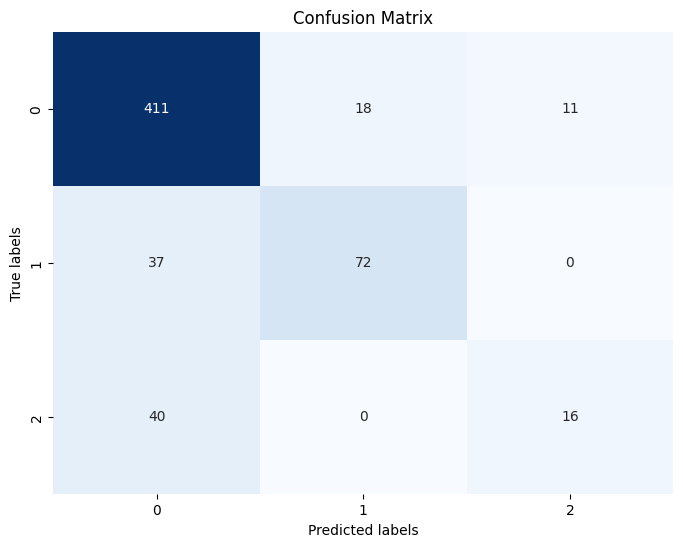

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.89       440
           1       0.80      0.66      0.72       109
           2       0.59      0.29      0.39        56

    accuracy                           0.82       605
   macro avg       0.74      0.63      0.66       605
weighted avg       0.81      0.82      0.81       605



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV file
df = pd.read_csv("/content/drive/MyDrive/AIR/without time.csv")

# Features are all columns except the last one
X = df.iloc[:, :-1]

# Target is the last column
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create the KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the KNN classifier with the best parameters
best_knn_classifier = KNeighborsClassifier(**best_params)
best_knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_knn_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot ROC curve (not applicable for KNN)


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=78)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (3022, 32)
Shape of X after SMOTE: (6906, 32)

Balance of positive and negative classes (%):


target_Labels
1    33.333333
0    33.333333
2    33.333333
Name: proportion, dtype: float64

Accuracy = 0.89
Recall = 0.89



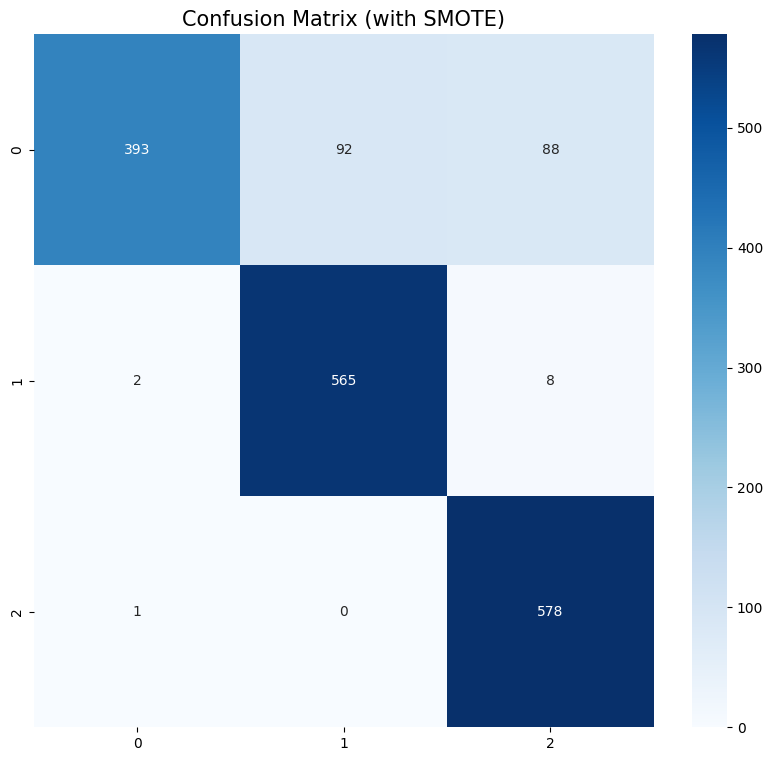

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

# Train the KNN classifier
model = KNeighborsClassifier()  # You can specify hyperparameters here, such as n_neighbors
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Calculate accuracy and recall
accuracy = accuracy_score(y_test, preds)
recall = recall_score(y_test, preds, average='weighted')  # Specify average='weighted' for 3 classes
print(f'Accuracy = {accuracy:.2f}\nRecall = {recall:.2f}\n')

# Plot confusion matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(10, 9))
plt.title('Confusion Matrix (with SMOTE)', size=15)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.show()


Accuracy (without SMOTE): 0.8253968253968254
Accuracy (with SMOTE): 0.9085118702953098


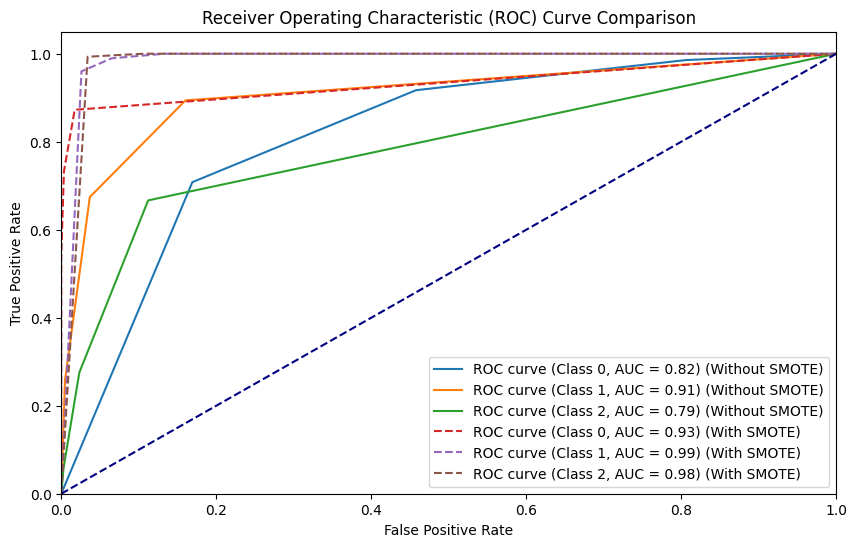

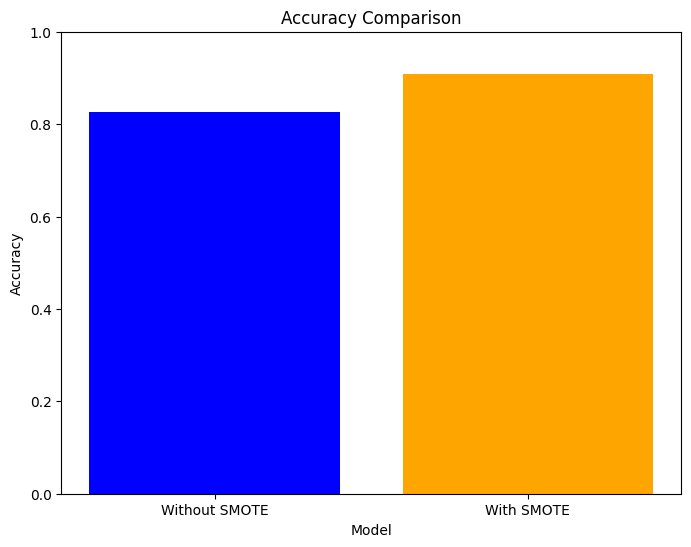

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import label_binarize

# Load data from CSV file
df = pd.read_csv("/content/drive/MyDrive/AIR/without time.csv")

# Features are all columns except the last one
X = df.iloc[:, :-1]

# Target is the last column
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the KNN classifier with specified hyperparameters
knn_classifier = KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='uniform')

# Train the KNN classifier
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_scaled)

# Calculate accuracy without SMOTE
accuracy_without_smote = accuracy_score(y_test, y_pred)
print("Accuracy (without SMOTE):", accuracy_without_smote)

# Apply SMOTE to balance the classes
sm = SMOTE(random_state=78)
X_sm, y_sm = sm.fit_resample(X, y)

# Split the data into training and testing sets with SMOTE
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

# Train the KNN classifier with SMOTE
knn_smote_classifier = KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='uniform')
knn_smote_classifier.fit(X_train_sm, y_train_sm)

# Make predictions on the test set with SMOTE
y_pred_smote = knn_smote_classifier.predict(X_test_sm)

# Calculate accuracy with SMOTE
accuracy_with_smote = accuracy_score(y_test_sm, y_pred_smote)
print("Accuracy (with SMOTE):", accuracy_with_smote)

# Convert y_test to binary labels for each class
y_test_binarized = label_binarize(y_test, classes=knn_classifier.classes_)

# Convert y_test_sm to binary labels for each class
y_test_sm_binarized = label_binarize(y_test_sm, classes=knn_smote_classifier.classes_)

# Plot ROC curves with and without SMOTE for comparison
plt.figure(figsize=(10, 6))

# Plot ROC curve without SMOTE for each class separately
for i in range(len(knn_classifier.classes_)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], knn_classifier.predict_proba(X_test_scaled)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (Class {i}, AUC = {roc_auc:.2f}) (Without SMOTE)')

# Plot ROC curve with SMOTE for each class separately
for i in range(len(knn_smote_classifier.classes_)):
    fpr_smote, tpr_smote, _ = roc_curve(y_test_sm_binarized[:, i], knn_smote_classifier.predict_proba(X_test_sm)[:, i])
    roc_auc_smote = auc(fpr_smote, tpr_smote)
    plt.plot(fpr_smote, tpr_smote, linestyle='--', label=f'ROC curve (Class {i}, AUC = {roc_auc_smote:.2f}) (With SMOTE)')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc="lower right")
plt.show()

# Plot accuracy comparison
plt.figure(figsize=(8, 6))
plt.bar(['Without SMOTE', 'With SMOTE'], [accuracy_without_smote, accuracy_with_smote], color=['blue', 'orange'])
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()


SVM

Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.8991735537190083


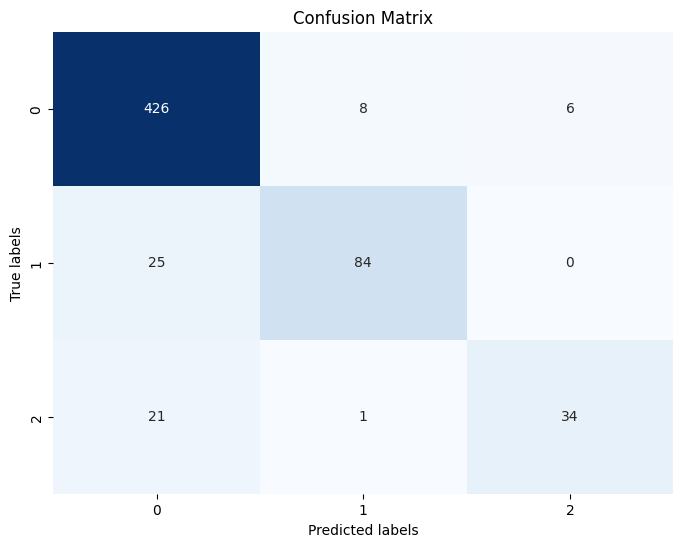

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       440
           1       0.90      0.77      0.83       109
           2       0.85      0.61      0.71        56

    accuracy                           0.90       605
   macro avg       0.89      0.78      0.82       605
weighted avg       0.90      0.90      0.89       605



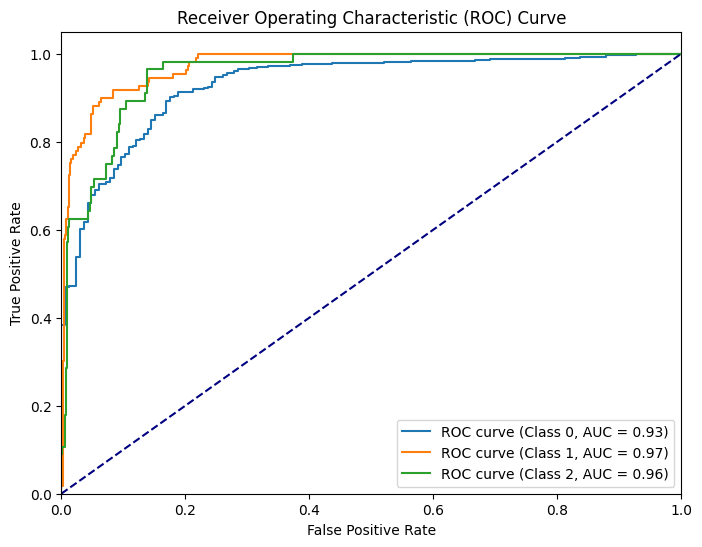

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV file
df = pd.read_csv("/content/drive/MyDrive/AIR/without time.csv")

# Features are all columns except the last one
X = df.iloc[:, :-1]

# Target is the last column
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Create the Support Vector Machine classifier
svm_classifier = SVC(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Support Vector Machine classifier with the best parameters
best_svm_classifier = SVC(random_state=42, **best_params)
best_svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_svm_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(best_svm_classifier.classes_)):  # Assuming number of classes in best_svm_classifier
    fpr, tpr, _ = roc_curve(y_test, best_svm_classifier.decision_function(X_test_scaled)[:,i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (Class {i}, AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=78)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (3022, 32)
Shape of X after SMOTE: (6906, 32)

Balance of positive and negative classes (%):


target_Labels
1    33.333333
0    33.333333
2    33.333333
Name: proportion, dtype: float64

Accuracy = 0.97



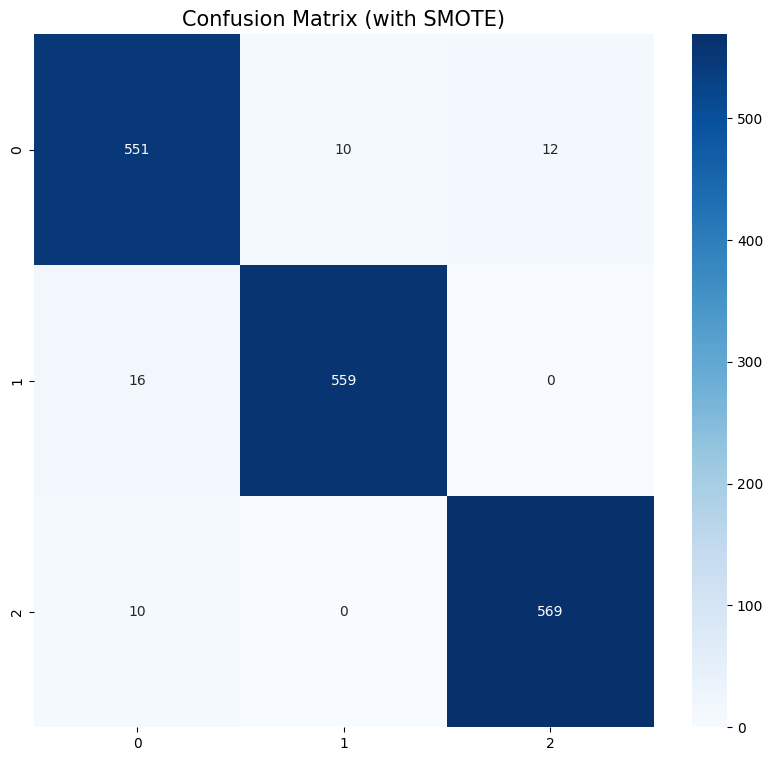

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

# Train the SVM classifier with specified hyperparameters
model = SVC(random_state=42, C=10.0, kernel='rbf', gamma='auto')  # Adjusted hyperparameters
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, preds)
print(f'Accuracy = {accuracy:.2f}\n')

# Plot confusion matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(10, 9))
plt.title('Confusion Matrix (with SMOTE)', size=15)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.show()


Accuracy (without SMOTE): 0.8968253968253969
Accuracy (with SMOTE): 0.924145917776491


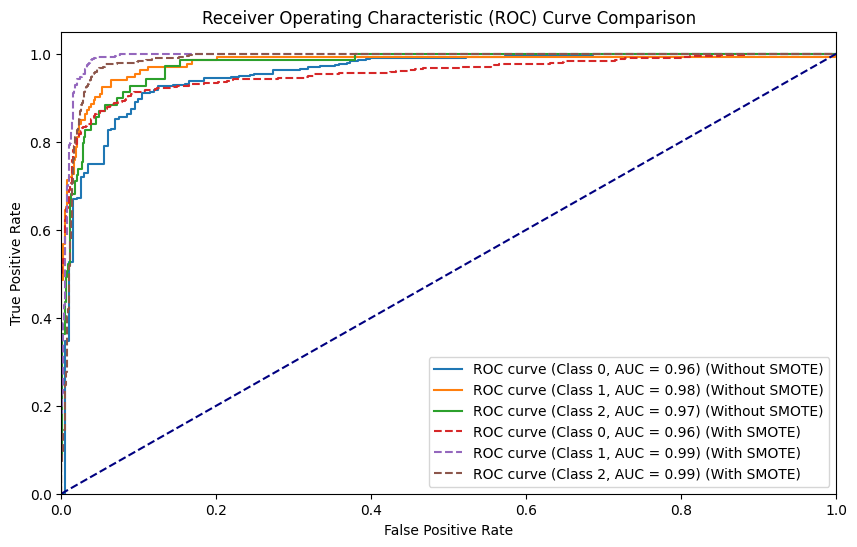

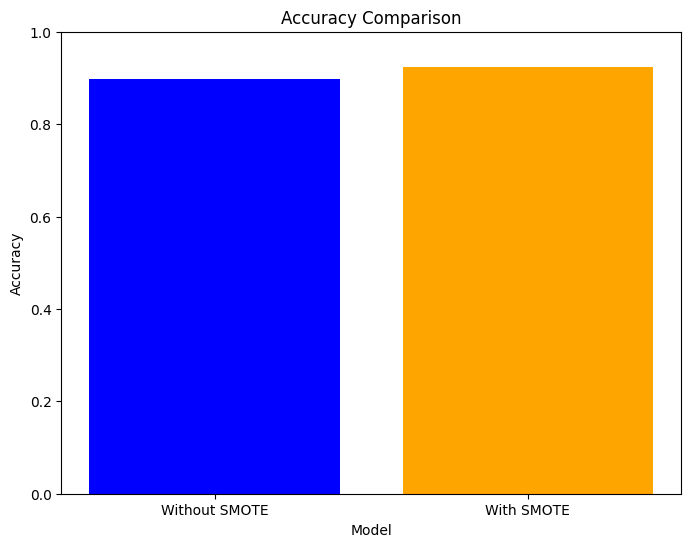

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load data from CSV file
df = pd.read_csv("/content/drive/MyDrive/AIR/without time.csv")

# Features are all columns except the last one
X = df.iloc[:, :-1]

# Target is the last column
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the SVM classifier with provided hyperparameters
svm_classifier = SVC(C=1, kernel='linear', gamma='scale', probability=True)

# Train the SVM classifier
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Calculate accuracy without SMOTE
accuracy_without_smote = accuracy_score(y_test, y_pred)
print("Accuracy (without SMOTE):", accuracy_without_smote)

# Apply SMOTE to balance the classes
sm = SMOTE(random_state=78)
X_sm, y_sm = sm.fit_resample(X, y)

# Split the data into training and testing sets with SMOTE
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

# Train the SVM classifier with SMOTE and provided hyperparameters
svm_smote_classifier = SVC(C=1, kernel='linear', gamma='scale', probability=True)
svm_smote_classifier.fit(X_train_sm, y_train_sm)

# Make predictions on the test set with SMOTE
y_pred_smote = svm_smote_classifier.predict(X_test_sm)

# Calculate accuracy with SMOTE
accuracy_with_smote = accuracy_score(y_test_sm, y_pred_smote)
print("Accuracy (with SMOTE):", accuracy_with_smote)

# Plot ROC curves with and without SMOTE for comparison
plt.figure(figsize=(10, 6))

# Plot ROC curve without SMOTE for each class separately
for i in range(len(svm_classifier.classes_)):
    # Create binary target where the current class is treated as positive and others as negative
    y_test_binary = y_test == svm_classifier.classes_[i]

    # Calculate probabilities for the positive class
    y_prob_positive = svm_classifier.predict_proba(X_test_scaled)[:, i]

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test_binary, y_prob_positive)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'ROC curve (Class {i}, AUC = {roc_auc:.2f}) (Without SMOTE)')

# Plot ROC curve with SMOTE for each class separately
for i in range(len(svm_smote_classifier.classes_)):
    # Create binary target where the current class is treated as positive and others as negative
    y_test_smote_binary = y_test_sm == svm_smote_classifier.classes_[i]

    # Calculate probabilities for the positive class
    y_prob_positive_smote = svm_smote_classifier.predict_proba(X_test_sm)[:, i]

    # Compute ROC curve
    fpr_smote, tpr_smote, _ = roc_curve(y_test_smote_binary, y_prob_positive_smote)

    # Calculate AUC
    roc_auc_smote = auc(fpr_smote, tpr_smote)

    # Plot ROC curve
    plt.plot(fpr_smote, tpr_smote, linestyle='--', label=f'ROC curve (Class {i}, AUC = {roc_auc_smote:.2f}) (With SMOTE)')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc="lower right")
plt.show()

# Plot accuracy comparison
plt.figure(figsize=(8, 6))
plt.bar(['Without SMOTE', 'With SMOTE'], [accuracy_without_smote, accuracy_with_smote], color=['blue', 'orange'])
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()


FNN


In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense

# Load data from CSV file
data = pd.read_csv('/content/drive/MyDrive/AIR/without time.csv')

# Assuming the last column is the target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and testing sets without SMOTE
X_train_no_smote, X_test_no_smote, y_train_no_smote, y_test_no_smote = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the data into training and testing sets with SMOTE
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X, y)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42)

# Standardize the features for both datasets
scaler = StandardScaler()
X_train_scaled_no_smote = scaler.fit_transform(X_train_no_smote)
X_test_scaled_no_smote = scaler.transform(X_test_no_smote)
X_train_scaled_smote = scaler.fit_transform(X_train_smote)
X_test_scaled_smote = scaler.transform(X_test_smote)

# Define the neural network model
model_no_smote = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled_no_smote.shape[1]),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # Assuming 3 classes for classification
])

# Compile the model
model_no_smote.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model without SMOTE
model_no_smote.fit(X_train_scaled_no_smote, y_train_no_smote, epochs=10, batch_size=32, validation_data=(X_test_scaled_no_smote, y_test_no_smote))

# Evaluate the model without SMOTE
accuracy_no_smote = model_no_smote.evaluate(X_test_scaled_no_smote, y_test_no_smote)[1]

# Train the model with SMOTE
model_smote = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled_smote.shape[1]),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
model_smote.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_smote.fit(X_train_scaled_smote, y_train_smote, epochs=10, batch_size=32, validation_data=(X_test_scaled_smote, y_test_smote))

# Evaluate the model with SMOTE
accuracy_smote = model_smote.evaluate(X_test_scaled_smote, y_test_smote)[1]

# Print accuracy comparison
print("Accuracy without SMOTE:", accuracy_no_smote)
print("Accuracy with SMOTE:", accuracy_smote)


Epoch 1/10
76/76 [==============================] - 2s 11ms/step - loss: 0.6867 - accuracy: 0.7530 - val_loss: 0.8825 - val_accuracy: 0.7603
Epoch 2/10
76/76 [==============================] - 1s 7ms/step - loss: 0.4697 - accuracy: 0.8233 - val_loss: 0.8223 - val_accuracy: 0.8231
Epoch 3/10
76/76 [==============================] - 0s 6ms/step - loss: 0.3453 - accuracy: 0.8655 - val_loss: 0.7802 - val_accuracy: 0.8397
Epoch 4/10
76/76 [==============================] - 0s 6ms/step - loss: 0.2855 - accuracy: 0.8829 - val_loss: 0.8527 - val_accuracy: 0.8529
Epoch 5/10
76/76 [==============================] - 0s 5ms/step - loss: 0.2484 - accuracy: 0.9003 - val_loss: 0.8301 - val_accuracy: 0.8628
Epoch 6/10
76/76 [==============================] - 0s 5ms/step - loss: 0.2215 - accuracy: 0.9185 - val_loss: 0.8078 - val_accuracy: 0.8727
Epoch 7/10
76/76 [==============================] - 0s 5ms/step - loss: 0.2003 - accuracy: 0.9251 - val_loss: 0.9201 - val_accuracy: 0.8760
Epoch 8/10
76/76 [=

54/54 [==============================] - 1s 10ms/step


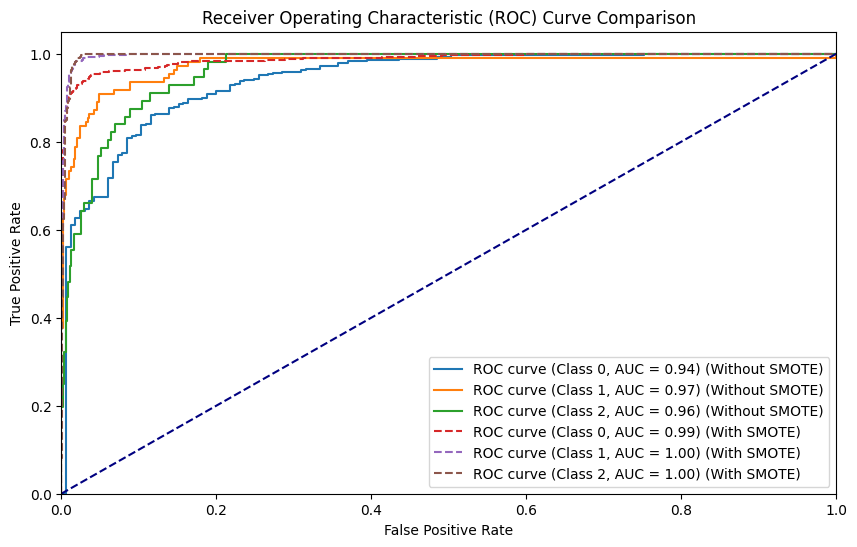

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Plot ROC curve without SMOTE
plt.figure(figsize=(10, 6))
fpr_no_smote = dict()
tpr_no_smote = dict()
roc_auc_no_smote = dict()
for i in range(len(np.unique(y))):
    y_pred_prob_no_smote = model_no_smote.predict(X_test_scaled_no_smote)
    fpr_no_smote[i], tpr_no_smote[i], _ = roc_curve(y_test_no_smote_binarized[:, i], y_pred_prob_no_smote[:, i])
    roc_auc_no_smote[i] = auc(fpr_no_smote[i], tpr_no_smote[i])
for i in range(len(np.unique(y))):
    plt.plot(fpr_no_smote[i], tpr_no_smote[i], label=f'ROC curve (Class {i}, AUC = {roc_auc_no_smote[i]:.2f}) (Without SMOTE)')

# Plot ROC curve with SMOTE
fpr_smote = dict()
tpr_smote = dict()
roc_auc_smote = dict()
for i in range(len(np.unique(y))):
    y_pred_prob_smote = model_smote.predict(X_test_scaled_smote)
    fpr_smote[i], tpr_smote[i], _ = roc_curve(y_test_smote, y_pred_prob_smote[:, i], pos_label=np.unique(y)[i])
    roc_auc_smote[i] = auc(fpr_smote[i], tpr_smote[i])
for i in range(len(np.unique(y))):
    plt.plot(fpr_smote[i], tpr_smote[i], linestyle='--', label=f'ROC curve (Class {i}, AUC = {roc_auc_smote[i]:.2f}) (With SMOTE)')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc="lower right")
plt.show()


Epoch 1/10
76/76 [==============================] - 1s 8ms/step - loss: 0.1368 - accuracy: 0.9504 - val_loss: 0.7838 - val_accuracy: 0.9025
Epoch 2/10
76/76 [==============================] - 1s 7ms/step - loss: 0.1263 - accuracy: 0.9595 - val_loss: 0.8336 - val_accuracy: 0.8992
Epoch 3/10
76/76 [==============================] - 1s 10ms/step - loss: 0.1174 - accuracy: 0.9578 - val_loss: 0.8763 - val_accuracy: 0.9008
Epoch 4/10
76/76 [==============================] - 1s 10ms/step - loss: 0.1060 - accuracy: 0.9628 - val_loss: 0.9406 - val_accuracy: 0.9074
Epoch 5/10
76/76 [==============================] - 1s 10ms/step - loss: 0.0971 - accuracy: 0.9710 - val_loss: 0.9760 - val_accuracy: 0.8992
Epoch 6/10
76/76 [==============================] - 1s 10ms/step - loss: 0.0901 - accuracy: 0.9719 - val_loss: 1.0362 - val_accuracy: 0.9091
Epoch 7/10
76/76 [==============================] - 1s 10ms/step - loss: 0.0819 - accuracy: 0.9764 - val_loss: 1.1463 - val_accuracy: 0.9025
Epoch 8/10
76/7

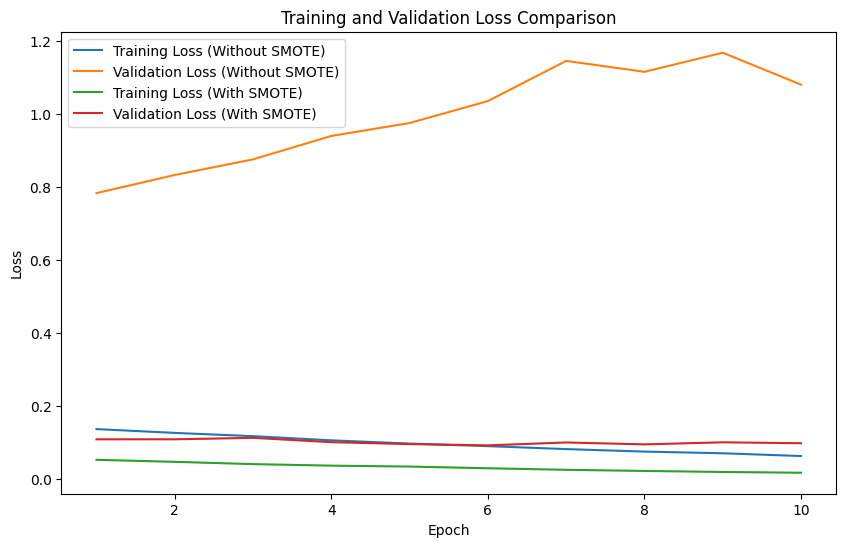

In [35]:
# Train the model without SMOTE
history_no_smote = model_no_smote.fit(X_train_scaled_no_smote, y_train_no_smote, epochs=10, batch_size=32, validation_data=(X_test_scaled_no_smote, y_test_no_smote))

# Train the model with SMOTE
history_smote = model_smote.fit(X_train_scaled_smote, y_train_smote, epochs=10, batch_size=32, validation_data=(X_test_scaled_smote, y_test_smote))

# Plot training and validation loss curves
plt.figure(figsize=(10, 6))
epochs = range(1, 11)
plt.plot(epochs, history_no_smote.history['loss'], label='Training Loss (Without SMOTE)')
plt.plot(epochs, history_no_smote.history['val_loss'], label='Validation Loss (Without SMOTE)')
plt.plot(epochs, history_smote.history['loss'], label='Training Loss (With SMOTE)')
plt.plot(epochs, history_smote.history['val_loss'], label='Validation Loss (With SMOTE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Comparison')
plt.legend()
plt.show()


MLP

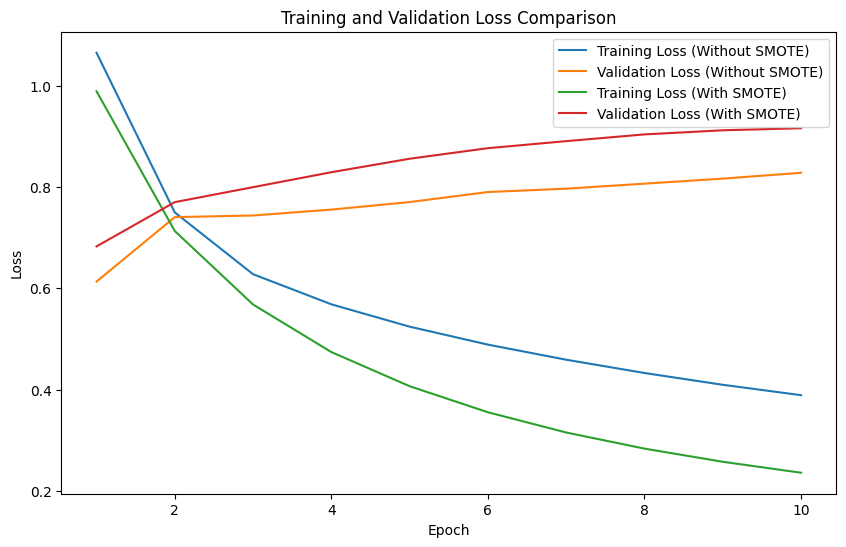

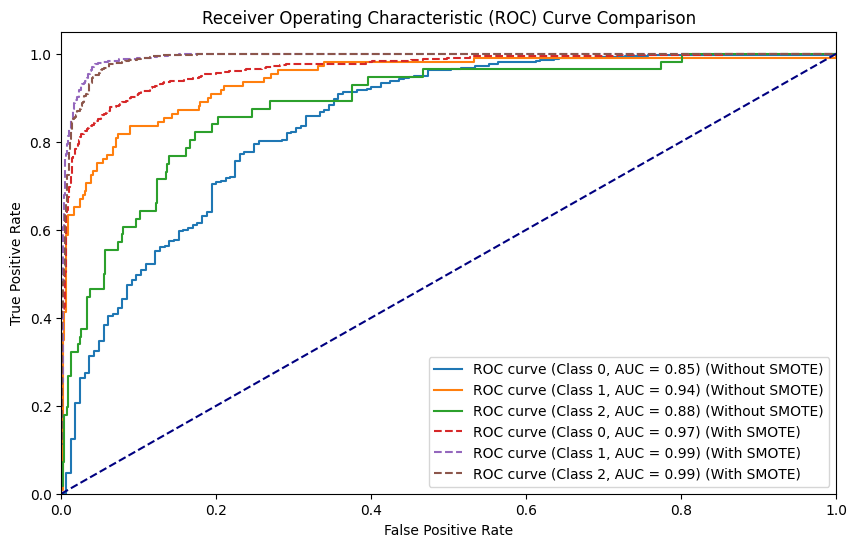

Accuracy without SMOTE: 0.828099173553719
Accuracy with SMOTE: 0.9160393746381007


In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import label_binarize

# Load data from CSV file
data = pd.read_csv('/content/drive/MyDrive/AIR/without time.csv')

# Assuming the last column is the target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and testing sets without SMOTE
X_train_no_smote, X_test_no_smote, y_train_no_smote, y_test_no_smote = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the data into training and testing sets with SMOTE
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X, y)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42)

# Standardize the features for both datasets
scaler = StandardScaler()
X_train_scaled_no_smote = scaler.fit_transform(X_train_no_smote)
X_test_scaled_no_smote = scaler.transform(X_test_no_smote)
X_train_scaled_smote = scaler.fit_transform(X_train_smote)
X_test_scaled_smote = scaler.transform(X_test_smote)

# Train the FNN classifier without SMOTE
model_no_smote = MLPClassifier(random_state=42, max_iter=1, warm_start=True)
train_loss_no_smote = []
val_loss_no_smote = []
for _ in range(10):  # Number of epochs
    model_no_smote.partial_fit(X_train_scaled_no_smote, y_train_no_smote, classes=np.unique(y))
    train_loss_no_smote.append(model_no_smote.loss_)
    val_loss_no_smote.append(model_no_smote.score(X_test_scaled_no_smote, y_test_no_smote))

# Train the FNN classifier with SMOTE
model_smote = MLPClassifier(random_state=42, max_iter=1, warm_start=True)
train_loss_smote = []
val_loss_smote = []
for _ in range(10):  # Number of epochs
    model_smote.partial_fit(X_train_scaled_smote, y_train_smote, classes=np.unique(y))
    train_loss_smote.append(model_smote.loss_)
    val_loss_smote.append(model_smote.score(X_test_scaled_smote, y_test_smote))

# Plot training and validation loss curves
plt.figure(figsize=(10, 6))
epochs = np.arange(1, 11)
plt.plot(epochs, train_loss_no_smote, label='Training Loss (Without SMOTE)')
plt.plot(epochs, val_loss_no_smote, label='Validation Loss (Without SMOTE)')
plt.plot(epochs, train_loss_smote, label='Training Loss (With SMOTE)')
plt.plot(epochs, val_loss_smote, label='Validation Loss (With SMOTE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Comparison')
plt.legend()
plt.show()

# Plot ROC curve without SMOTE
plt.figure(figsize=(10, 6))
y_test_no_smote_binarized = label_binarize(y_test_no_smote, classes=np.unique(y))
y_prob_no_smote = model_no_smote.predict_proba(X_test_scaled_no_smote)
fpr_no_smote = dict()
tpr_no_smote = dict()
roc_auc_no_smote = dict()
for i in range(len(np.unique(y))):
    fpr_no_smote[i], tpr_no_smote[i], _ = roc_curve(y_test_no_smote_binarized[:, i], y_prob_no_smote[:, i])
    roc_auc_no_smote[i] = auc(fpr_no_smote[i], tpr_no_smote[i])
for i in range(len(np.unique(y))):
    plt.plot(fpr_no_smote[i], tpr_no_smote[i], label=f'ROC curve (Class {i}, AUC = {roc_auc_no_smote[i]:.2f}) (Without SMOTE)')

# Plot ROC curve with SMOTE
y_prob_smote = model_smote.predict_proba(X_test_scaled_smote)
fpr_smote = dict()
tpr_smote = dict()
roc_auc_smote = dict()
for i in range(len(np.unique(y))):
    fpr_smote[i], tpr_smote[i], _ = roc_curve(y_test_smote, y_prob_smote[:, i], pos_label=np.unique(y)[i])
    roc_auc_smote[i] = auc(fpr_smote[i], tpr_smote[i])
for i in range(len(np.unique(y))):
    plt.plot(fpr_smote[i], tpr_smote[i], linestyle='--', label=f'ROC curve (Class {i}, AUC = {roc_auc_smote[i]:.2f}) (With SMOTE)')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc="lower right")
plt.show()

# Calculate accuracy without SMOTE
preds_no_smote = model_no_smote.predict(X_test_scaled_no_smote)
accuracy_no_smote = accuracy_score(y_test_no_smote, preds_no_smote)

# Calculate accuracy with SMOTE
preds_smote = model_smote.predict(X_test_scaled_smote)
accuracy_smote = accuracy_score(y_test_smote, preds_smote)

# Print accuracy comparison
print("Accuracy without SMOTE:", accuracy_no_smote)
print("Accuracy with SMOTE:", accuracy_smote)
